### Importing Liberaries & Cleanning The Dataset

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Netflix Content Strategy\netflix_content.csv')

df = df_original.copy()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [3]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show


-   Notice that the Hours Viewed column dtype is not a numerical format, we need to convert it to a float instead

In [4]:
# converting the column to a float instead of a string
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)

df['Hours Viewed'].head()

0    812100000.0
1    665100000.0
2    622800000.0
3    507700000.0
4    503000000.0
Name: Hours Viewed, dtype: float64

In [5]:
# Convert the 'Release Date' column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract year, month, and day from the 'Release Date' column
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day


In [6]:
# convert the Year column to an integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

# Convert the Month column to an integer
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 24812 non-null  int32         
 7   Month                24812 non-null  int32         
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 1.5+ MB


### Dataset Exploration (EDA):
-   ### Points to Explore:
    -   1. Global Availability Analysis
    -   2. Release Date Analysis
    -   3. Hours Viewed Analysis
    -   4. Language Analysis
    -   5. Seasonal Analysis
    -   6. Correlation Analysis

#### 3. Hours Viewed Analysis:
- What is the distribution of viewing hours on Netflix between movies and shows?
- What is the distribution of viewing hours on Netflix by different languages?

    

In [7]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Year,Month,Day
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,2023,3,23.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,2023,1,5.0


In [8]:
# Average viewed hours
average_hours_viewed = df['Hours Viewed'].mean()

average_hours_viewed

6384084.314041593

In [9]:
# Calculate hours viewed for each content type
hours_viewed_by_content_type = df.groupby('Content Type')['Hours Viewed'].sum().to_frame().reset_index()
hours_viewed_by_content_type = hours_viewed_by_content_type.sort_values(by='Hours Viewed',ascending=False)

hours_viewed_by_content_type

,Content Type,Hours Viewed
1,Show,1.077641e+11
0,Movie,5.063780e+10


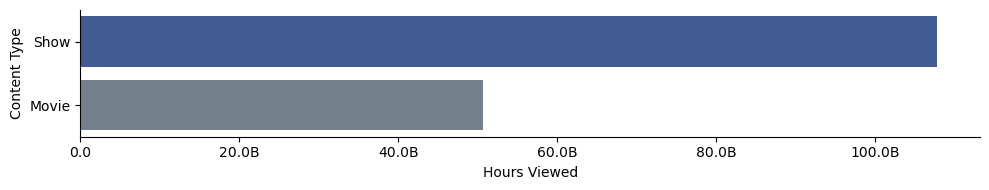

In [11]:

colors = ['#3557A0', 'slategrey']

plt.figure(figsize=(10, 2))

# Define a custom function to format tick labels with billion abbreviation
def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.1f}B"
    else:
        return f"{value:.1f}"

sns.barplot(data=hours_viewed_by_content_type,
                x='Hours Viewed',
                y='Content Type',
                palette=colors,
                
)

# Format y-axis tick labels
plt.gca().xaxis.set_major_formatter(billion_formatter)


sns.despine()
plt.tight_layout()
plt.show()


-   #### Key Insights:
    -  Shows have been viewed for approximately 100.0 billion hours, which is double the hours viewed for movies (approximately 50.0 billion hours).
    -  This data suggests that viewers are more inclined to spend their time watching shows rather than movies. This could be due to the episodic nature of shows, which often keep viewers engaged over a longer period.
    -  Movies have been viewed for approximately 50.0 billion hours, which is significantly less than the hours viewed for shows (approximately 100.0 billion hours). This could be due to the length and brevity of movies, which can make them more accessible to viewers.

In [12]:
# Selecting the top 15 titles by hours view
top_15_viewed = df.nlargest(15, 'Hours Viewed')
top_15_viewed

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Year,Month,Day
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,2023,3,23.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,2023,1,5.0
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,2023,6,17.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,2022,12,30.0
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,2023,8,31.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,2022,11,23.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,2023,5,4.0
5,You: Season 4,Yes,2023-02-09,440600000.0,English,Show,2023,2,9.0
6,La Reina del Sur: Season 3,No,2022-12-30,429600000.0,English,Show,2022,12,30.0
7,Outer Banks: Season 3,Yes,2023-02-23,402500000.0,English,Show,2023,2,23.0


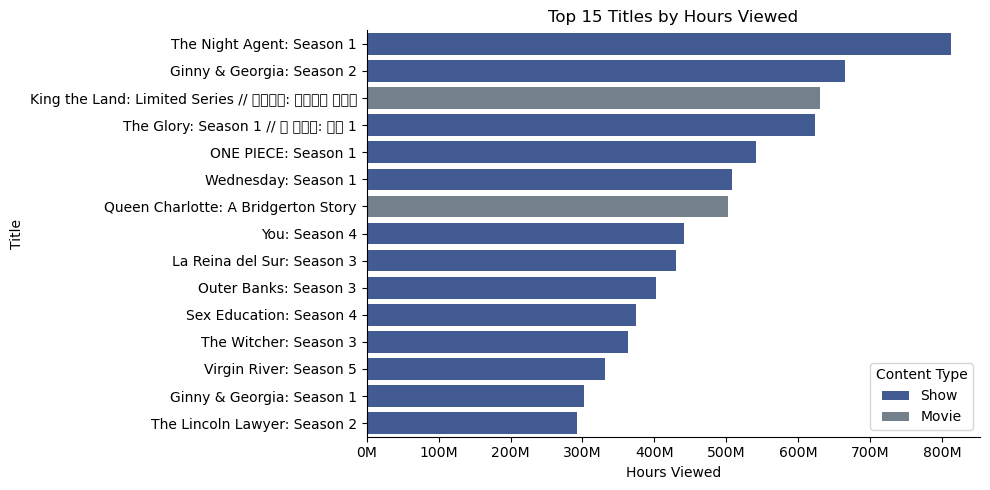

In [13]:

colors = ['#3557A0', 'slategrey']

plt.figure(figsize=(10, 5))

sns.barplot(data=top_15_viewed,
                x='Hours Viewed',
                y='Title',
                hue='Content Type',
                palette=colors,
                
                )

def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.1f}B"
    elif value <= 1e9:
        return f"{value / 1e6:.0f}M"
    else:
        return f"{value:.1f}"
# Format y-axis tick labels
plt.gca().xaxis.set_major_formatter(billion_formatter)

plt.title('Top 15 Titles by Hours Viewed')


sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  The Night Agent: Season 1" stands out with approximately 800 million hours viewed, making it the most-watched title on the list. Following closely is "Ginny & Georgia: Season 2" with around 600 million hours viewed.
    -  The top 15 titles consist mostly of TV shows, with only a few movies making the list. This indicates a strong preference for serialized content among viewers.
    -  Titles like "La Reina del Sur: Season 3" show that international content is also drawing significant viewership, highlighting the global reach of streaming platforms.